# Hyper Alignment of EEG Data

Try stuff. 

In [1]:
%matplotlib inline

import os
import csv

import numpy as np
import matplotlib.pyplot as plt

import mne

from mne.preprocessing import ICA
#from autoreject import AutoReject

In [2]:
## Functions

def org_files(files):
    """Get the preprocessed, EEG data file names (csv format) a specified subject."""

    eeg = [fi for fi in files if 'events' not in fi and 'channels' not in fi]
    evs = [fi for fi in files if 'events' in fi]
    #chs = [fi for fi in files if 'channels' in fi]

    # Quick hack to ignore subjs with problematic files
    if not len(eeg) == len(evs):
        print('Oh Shit. Something seems to have gone wrong.')
        return None, None

    return eeg, evs

def get_files(files, num):
    """Return specified file type from list of files."""
    
    for file in files:
        if num in file:
            return file

## Settings


In [3]:
# Settings
setting_1 = None
setting_2 = None

## Load Data

Dataset description:

The EEG data used is a database collected and made available by the Child Mind Institute.

It is part of the Multimodal Resource for Studying Information Processing in the Developing Brain (MIPDB) database.

MIPDB Link: http://fcon_1000.projects.nitrc.org/indi/cmi_eeg/

EEG Data Link: http://fcon_1000.projects.nitrc.org/indi/cmi_eeg/eeg.html

In [4]:
# Set data path
dat_path = '/Users/tom/Desktop/HyperEEG_Project/Data/'
# ToDo: general stuff to get a list of available subjects

In [5]:
# Set subject to load
sub_num = 'A00063117'
subj_path = os.path.join(dat_path, sub_num, 'EEG', 'raw', 'csv_format')

In [6]:
# Get list of subject files
subj_files = os.listdir(subj_path)

# Restrict to only data files (avoids hidden files, etc)
subj_files = [file for file in subj_files if 'A0' in file]

In [7]:
# Organize files
eeg_files, ev_files = org_files(subj_files)

In [8]:
# Get specific block
f_type = '001'
cur_eeg_file, cur_ev_file = get_files(eeg_files, f_type), get_files(ev_files, f_type)

In [9]:
# Data info / parameters
s_freq = 500

# Load data file
dat = np.loadtxt(os.path.join(subj_path, cur_eeg_file), delimiter=',')

## Set up Data

Do any set up steps, including:
- Setting channel positions
- Setting the reference
- Adding event codes

In [10]:
# Read montage - GSN 129 montage
montage = mne.channels.read_montage('GSN-HydroCel-129')

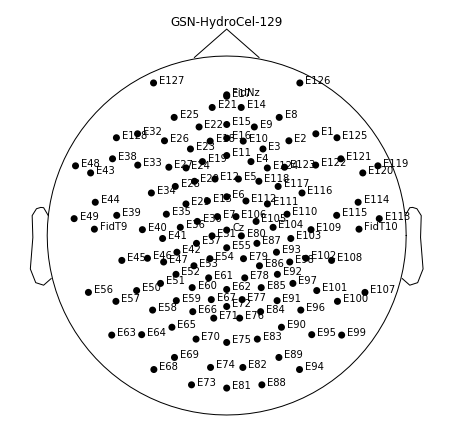

In [11]:
# Check out the montage plot
montage.plot();

In [12]:
# Create the info structure needed by MNE
#  ToDo: check the channels
info = mne.create_info(montage.ch_names[3:131], s_freq, 'eeg', montage)

In [13]:
# Create the MNE Raw data object
raw = mne.io.RawArray(dat, info)

Creating RawArray with float64 data, n_channels=128, n_times=228255
    Range : 0 ... 228254 =      0.000 ...   456.508 secs
Ready.


In [14]:
# Create a stim channel
stim_info = mne.create_info(['stim'], s_freq, 'stim')
stim_raw = mne.io.RawArray(np.zeros(shape=[1, len(raw._times)]), stim_info)

# Add stim channel to data object
raw.add_channels([stim_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=228255
    Range : 0 ... 228254 =      0.000 ...   456.508 secs
Ready.


<RawArray  |  None, n_channels x n_times : 129 x 228255 (456.5 sec), ~225.1 MB, data loaded>

### Events

In [15]:
# Load events from file

# Initialize headers and variable to store event info
headers = ['type', 'value', 'latency', 'duration', 'urevent']
evs = np.empty(shape=[0, 3])

# Load events from csv file
with open(os.path.join(subj_path, cur_ev_file), 'r') as csv_file:
    
    reader = csv.reader(csv_file)
    for row in reader:

        # Skip the empty rows
        if row == []: continue
        
        # Skip the header row, since there is one for every event...
        if row[0] == 'type': continue
        
        # Collect actual event data rows
        evs = np.vstack((evs, np.array([int(row[2]), 0, int(row[0])])))

# Add events to data object
raw.add_events(evs, stim_channel='stim')

# Check events
dat_evs = mne.find_events(raw)

6 events found
Event IDs: [30 90]


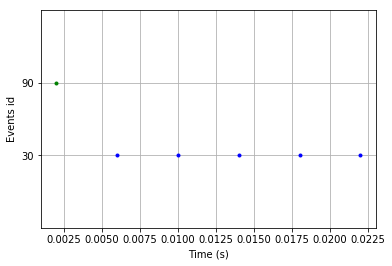

In [32]:
# Check event codes
_ = mne.viz.plot_events(dat_evs, raw.info['sfreq'])

## Sanity Check Data

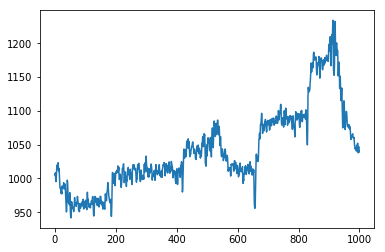

In [16]:
# Print out a small snippet of data
plt.plot(raw._data[0, 0:1000])

## Pre-Processing

Run pre-processing on the data. 

In [17]:
# Referencing
#raw.set_eeg_reference()

### ICA

In [18]:
# High pass filter for ICA
#raw.filter(l_freq=1., h_freq=None, fir_design='firwin')

In [19]:
# ICA Settings
#ica_setting_1 = None
#ica_setting_2 = None

In [20]:
# Initialize ICA object
#ica = ICA()

In [21]:
# Fit ICA
#ica.fit(raw)

In [22]:
# You can now use the ICA solution to find EOG related components
#ica.find_bads_eog()

In [23]:
# Plot the ICA components
#ica.plot_components()

In [24]:
# Save out the ICA solution
#ica.save()

### Filtering

In [25]:
# Filter setting
low_freq = 1
high_freq = 20

In [26]:
# Filter EEG data
raw.filter(l_freq=low_freq, h_freq=high_freq, fir_design='firwin')

Setting up band-pass filter from 1 - 20 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 5.0 Hz
Filter length of 1651 samples (3.302 sec) selected


<RawArray  |  None, n_channels x n_times : 129 x 228255 (456.5 sec), ~225.1 MB, data loaded>

### Epoching

In [27]:
# Epoch settings
#tmin, tmax = None, None

In [28]:
# Epoch data
#epochs = mne.Epochs(eeg_dat, ...)

### AutoReject

In [29]:
# Initialize autoreject object
#ar = AutoReject()

In [30]:
# Run AutoReject
#epochs, rej_log = ar.fit_transform(epochs, True)

# Analyses

At this point, the rest becomes specific to the particular analyses that need to be done.

In [31]:
# Do cool analyses!